# Cyclistic bicycle sharing service analysis

#### Case Study for the final project of the Google Data Analytics Professional Certificate

The case study has the objective to analyze the data of the fictional company Cyclistic, a bicycle share service in Chicago, to answer or know more about the following questions:

1. How the members and casual cyclists differ on the use of the Cyclistic bicycles?
2. Why casual members would like to acquire the Cyclistic annual plans?
4. How Cyclistic can use digital media to influence the casual members to turn into annual members?



#### Data
The [Data](https://divvy-tripdata.s3.amazonaws.com/index.html) that we will utilize is public domain, subject to the terms and conditions of this [License Agreement](https://www.divvybikes.com/data-license-agreement).Lyft Bikes and Scooters, LLC (“Bikeshare”) operates the City of Chicago’s (“City”) Divvy bicycle sharing service. Bikeshare and the City are committed to supporting bicycling as an alternative transportation option. There's three types of pricing: single ride, day pass and annual membership. The users that acquire the single ride or day pass are the 'casual' members and the users that acquire the annual membership are the 'member' members. We will utilize the 'bikeshare' data from January to December of 2022 (12 months). The data is separated by month, so there will be 12 data sets.


#### Analysis 
1. Import packages that we will utilize along the analysis.


In [1]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt 
import pandas as pd
import numpy as np

2. Import the 12 data sets (January to December of 2022) and concatenate them on one DataFrame to do the analysis('year_2022').

In [2]:
jan_2022 = pd.read_csv('/kaggle/input/google-casestudy-1-2022-2023/202201-divvy-tripdata.csv')
fev_2022 = pd.read_csv('/kaggle/input/google-casestudy-1-2022-2023/202202-divvy-tripdata.csv')
mar_2022 = pd.read_csv('/kaggle/input/google-casestudy-1-2022-2023/202203-divvy-tripdata.csv')
abr_2022 = pd.read_csv('/kaggle/input/google-casestudy-1-2022-2023/202204-divvy-tripdata.csv')
mai_2022 = pd.read_csv('/kaggle/input/google-casestudy-1-2022-2023/202205-divvy-tripdata.csv')
jun_2022 = pd.read_csv('/kaggle/input/google-casestudy-1-2022-2023/202206-divvy-tripdata.csv')
jul_2022 = pd.read_csv('/kaggle/input/google-casestudy-1-2022-2023/202207-divvy-tripdata.csv')
ago_2022 = pd.read_csv('/kaggle/input/google-casestudy-1-2022-2023/202208-divvy-tripdata.csv')
set_2022 = pd.read_csv('/kaggle/input/google-casestudy-1-2022-2023/202209-divvy-publictripdata.csv')
out_2022 = pd.read_csv('/kaggle/input/google-casestudy-1-2022-2023/202210-divvy-tripdata.csv')
nov_2022 = pd.read_csv('/kaggle/input/google-casestudy-1-2022-2023/202211-divvy-tripdata.csv')
dez_2022 = pd.read_csv('/kaggle/input/google-casestudy-1-2022-2023/202212-divvy-tripdata.csv')

year_2022 = pd.concat([jan_2022,fev_2022,mar_2022,abr_2022,mai_2022,jun_2022,jul_2022,ago_2022,set_2022,out_2022,nov_2022,dez_2022],ignore_index=True)

3. Verify the rows and columns, some of the columns has null values, but we will not use these columns on our analysis. There is no duplicates values on this data set.


In [3]:
year_2022.info(show_counts=True)
# year_2022.drop_duplicates()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5667717 entries, 0 to 5667716
Data columns (total 13 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   ride_id             5667717 non-null  object 
 1   rideable_type       5667717 non-null  object 
 2   started_at          5667717 non-null  object 
 3   ended_at            5667717 non-null  object 
 4   start_station_name  4834653 non-null  object 
 5   start_station_id    4834653 non-null  object 
 6   end_station_name    4774975 non-null  object 
 7   end_station_id      4774975 non-null  object 
 8   start_lat           5667717 non-null  float64
 9   start_lng           5667717 non-null  float64
 10  end_lat             5661859 non-null  float64
 11  end_lng             5661859 non-null  float64
 12  member_casual       5667717 non-null  object 
dtypes: float64(4), object(9)
memory usage: 562.1+ MB


4. New column created 'time_elapsed_minutes', utilizing the columns 'started_at' and 'ended_at' to know the average minutes of the bicycles trips. There are some negative values that we will correct, probably some bad input on the data.


In [4]:
year_2022['time_elapsed_minutes'] = (pd.to_datetime(year_2022['ended_at']) - pd.to_datetime(year_2022['started_at'])).dt.total_seconds()/60
year_2022.query('time_elapsed_minutes < 0')
year_2022['time_elapsed_minutes'] = year_2022['time_elapsed_minutes'].abs()

5. We will create two new columns 'day_of_week' and 'month' to define the days of week and month that corresponds to each trip.
* 'day_of_week' with 0 to 6 values, 0 being Monday and 6 Sunday.
* 'month' with 1 to 12 values, 1 being January and 12 December.

In [5]:
year_2022['day_of_week'] = pd.DatetimeIndex(year_2022['started_at']).dayofweek
year_2022['month'] = pd.DatetimeIndex(year_2022['started_at']).month

6. Group the data by the 'member_casual' columns ('casual': single ride or day pass, 'member': annual pass) and verify the numbers of trip, max, min and average for each member.


In [6]:
year_2022.groupby('member_casual')['time_elapsed_minutes'].agg(['count','max','min','mean'])

,count,max,min,mean
member_casual,,,,
casual,2322032,41387.25,0.0,29.145769
member,3345685,10353.35,0.0,12.717261


7. We can see that the query showed some trips with 0 values, we will remove these rows and do the same query again. 


In [7]:
year_2022 = year_2022.drop(year_2022.query('time_elapsed_minutes == 0').index)
year_2022.groupby('member_casual')['time_elapsed_minutes'].agg(['count','max','min','mean'])

,count,max,min,mean
member_casual,,,,
casual,2321824,41387.25,0.016667,29.148380
member,3345462,10353.35,0.016667,12.718108


8. We still see some strange values on the 'min' column, there would be difficult to have trips that are less than 1 minute long, so we will filter and query again. After that we will verify the percentage of each member.

In [8]:
year_2022 = year_2022.drop(year_2022.query('time_elapsed_minutes < 1').index)
year_2022.groupby('member_casual')['time_elapsed_minutes'].agg(['count','max','min','mean'])

,count,max,min,mean
member_casual,,,,
casual,2274183,41387.25,1.0,29.750238
member,3272519,10353.35,1.0,12.992471


In [9]:
p = year_2022.groupby('member_casual')['ride_id'].count().reset_index()
p['percentage'] = 100 * p['ride_id']/p['ride_id'].sum()
p

,member_casual,ride_id,percentage
0,casual,2274183,41.000634
1,member,3272519,58.999366


9. In the previous query we identified that the 'casual' users have an average higher than the 'member' users, the trips are longer which can indicate trips on free time, the 'member' users have more trips but shorter, that indicates day to day trips, but we will need to verify more data for this conclusion. We will query for day of week, group the data in the 'day_of_week' column and 'member_casual' column, and count the number of trips for each user in each day of week.

In [10]:
year_2022.groupby(['day_of_week','member_casual'])['time_elapsed_minutes'].agg('count')

day_of_week  member_casual
0            casual           272051
             member           463269
1            casual           258294
             member           507800
2            casual           268784
             member           512628
3            casual           303016
             member           520795
4            casual           327771
             member           456921
5            casual           463304
             member           432859
6            casual           380963
             member           378247
Name: time_elapsed_minutes, dtype: int64

10. We will use a bar chart for a better vizualization.

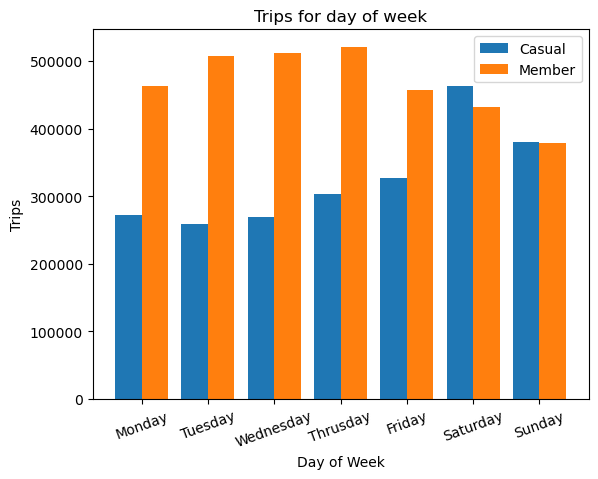

In [11]:
x = np.arange(7)
grouped_days = year_2022[['day_of_week','member_casual','time_elapsed_minutes']]
grouped_casual = grouped_days.query("member_casual == 'casual'").groupby('day_of_week').agg('count')
grouped_member = grouped_days.query("member_casual == 'member'").groupby('day_of_week').agg('count')
plt.bar(x-0.2,grouped_casual['time_elapsed_minutes'], width=0.4)
plt.bar(x+0.2,grouped_member['time_elapsed_minutes'], width=0.4)
plt.title("Trips for day of week")
plt.xticks(x,['Monday','Tuesday','Wednesday','Thrusday','Friday','Saturday','Sunday'],rotation=20)
plt.xlabel('Day of Week')
plt.ylabel('Trips')
plt.legend(['Casual','Member'])
plt.show()

11. The 'member' have more trips during weekday and they decrese on the weekend. The 'casual' have less trips on weekdays and on weekend they surpass the 'member'. Corroborates with the theory that the 'casual' utilizes the bikeshare to do trips on leisure or free time, and the 'member' utilizes the service in the day to day tasks.

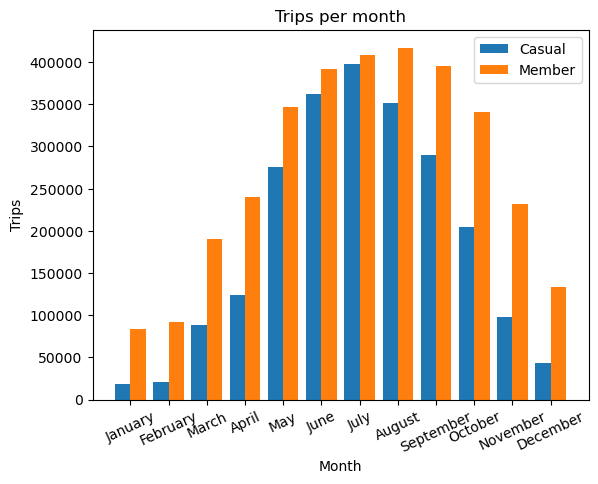

In [12]:
x_1 = np.arange(12)
grouped_month = year_2022[['member_casual','month','time_elapsed_minutes']]
grouped_month_casual = grouped_month.query('member_casual == "casual"').groupby('month').agg('count')
grouped_month_member = grouped_month.query('member_casual == "member"').groupby('month').agg('count')
plt.bar(x_1-0.2,grouped_month_casual['time_elapsed_minutes'], width=0.4)
plt.bar(x_1+0.2,grouped_month_member['time_elapsed_minutes'], width=0.4)
plt.title('Trips per month')
plt.xticks(x_1,['January','February','March','April','May','June','July','August','September','October','November','December'],rotation=25)
plt.xlabel('Month')
plt.ylabel('Trips')
plt.legend(['Casual','Member'])
plt.show()


12. We can see that there is grat variation on the use of the bikeshare servive though the year, we can associate to the seasons. January and February are the middle and end of winter in Chicago, March to May we see an increase with the spring arrival, in june to August we see the peak on the bikeshare service with the summer arrival, specialy on July we can see that the number of trips of the 'casual' and 'member' users are almost the same, in September to November we can see a decline with the fall arrival, bigger to te 'casual' users, and finally in Deceber with the winter arrival we have more decrease.

In [13]:
year_2022.groupby(['start_station_name'])['member_casual'].agg('count').sort_values(ascending=False).head(15)

start_station_name
Streeter Dr & Grand Ave               73766
DuSable Lake Shore Dr & Monroe St     40540
DuSable Lake Shore Dr & North Blvd    39226
Michigan Ave & Oak St                 38966
Wells St & Concord Ln                 36944
Clark St & Elm St                     34451
Millennium Park                       34352
Kingsbury St & Kinzie St              33187
Theater on the Lake                   32465
Wells St & Elm St                     31013
Broadway & Barry Ave                  29425
Clark St & Armitage Ave               28581
Wabash Ave & Grand Ave                27208
Wilton Ave & Belmont Ave              27027
Clark St & Lincoln Ave                26840
Name: member_casual, dtype: int64

13. We did a query to show the 15 most utilized station to start the trip, with the two users 'member' and 'casual', the next querys will be focusing on the 'casual' users to verify the most utilized station to start the trip for them.

In [14]:
station_casual_year = year_2022.query('member_casual =="casual"').groupby(['start_station_name'])['time_elapsed_minutes'].agg('count').sort_values(ascending=False)
station_casual_year.head(10)

start_station_name
Streeter Dr & Grand Ave               57074
DuSable Lake Shore Dr & Monroe St     31329
Millennium Park                       25085
Michigan Ave & Oak St                 24865
DuSable Lake Shore Dr & North Blvd    23179
Shedd Aquarium                        19898
Theater on the Lake                   18218
Wells St & Concord Ln                 15988
Dusable Harbor                        13875
Clark St & Armitage Ave               13603
Name: time_elapsed_minutes, dtype: int64

14. The Streeter Dr & Grand Ave receive a large number of trips started, as well as DuSable Lake Shore Dr & Monroe St, the query consider the whole year, but we will verify in the months that there was a peak of 'casual' users, May to September.

In [15]:
station_casual_month = year_2022.query('4 < month < 9 & member_casual =="casual"')
station_casual_month = station_casual_month.groupby(['start_station_name','start_lat','start_lng'])['time_elapsed_minutes'].agg('count').sort_values(ascending=False)
station_casual_month.head(10)

start_station_name                  start_lat  start_lng 
Streeter Dr & Grand Ave             41.892278  -87.612043    27086
DuSable Lake Shore Dr & Monroe St   41.880958  -87.616743    13878
DuSable Lake Shore Dr & North Blvd  41.911722  -87.626804    12360
Theater on the Lake                 41.926277  -87.630834     9528
Michigan Ave & Oak St               41.900960  -87.623777     9166
Millennium Park                     41.881032  -87.624084     7128
Dusable Harbor                      41.886976  -87.612813     6460
Montrose Harbor                     41.963982  -87.638181     6001
Wells St & Concord Ln               41.912133  -87.634656     5884
Clark St & Lincoln Ave              41.915689  -87.634600     5865
Name: time_elapsed_minutes, dtype: int64

15. The top 2 stations are the same as the last query, having some changes in the others, mostly in the order of them, we will put this data in a graph to better visualize.

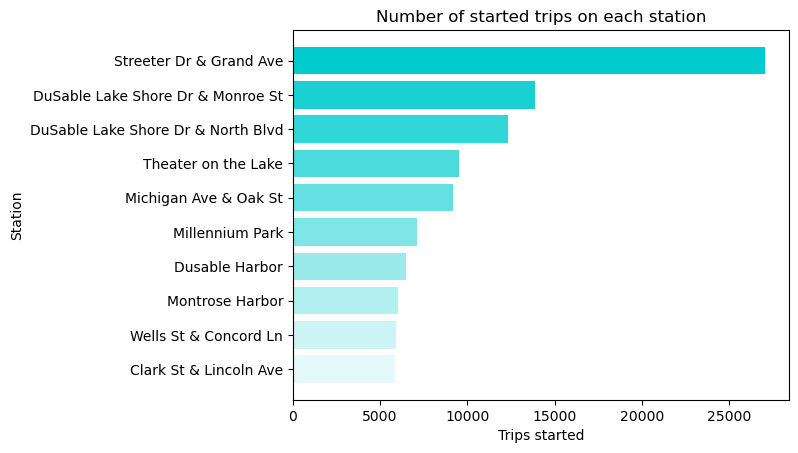

In [16]:
station_casual_month_st = station_casual_month.head(10).sort_values()
cores= [[0,0.8,0.81,(11-i)/10] for i in range(len(station_casual_month_st),0,-1)]
plt.barh(station_casual_month_st.index.get_level_values(0),station_casual_month_st.values,color=cores)
plt.xlabel('Trips started')
plt.ylabel('Station')
plt.title('Number of started trips on each station')
plt.show()

16. The station Streeter Dr & Grand Ave had the most started trips between May and September by the 'casual' users.


In [17]:
station_casual_month_end = year_2022.query('4 < month < 9 & member_casual =="casual"')
station_casual_month_end = station_casual_month_end.groupby(['end_station_name','end_lat','end_lng'])['time_elapsed_minutes'].agg('count').sort_values(ascending=False)
station_casual_month_end.head(10)

end_station_name                    end_lat    end_lng   
Streeter Dr & Grand Ave             41.892278  -87.612043    39102
DuSable Lake Shore Dr & North Blvd  41.911722  -87.626804    19636
DuSable Lake Shore Dr & Monroe St   41.880958  -87.616743    18894
Michigan Ave & Oak St               41.900960  -87.623777    15107
Theater on the Lake                 41.926277  -87.630834    13994
Millennium Park                     41.881032  -87.624084    12425
Wells St & Concord Ln               41.912133  -87.634656     9821
Montrose Harbor                     41.963982  -87.638181     9100
Dusable Harbor                      41.886976  -87.612813     9030
Clark St & Lincoln Ave              41.915689  -87.634600     9030
Name: time_elapsed_minutes, dtype: int64

17. Now we will see stations that has the most finished trips, and we will visualize this data on a graph.


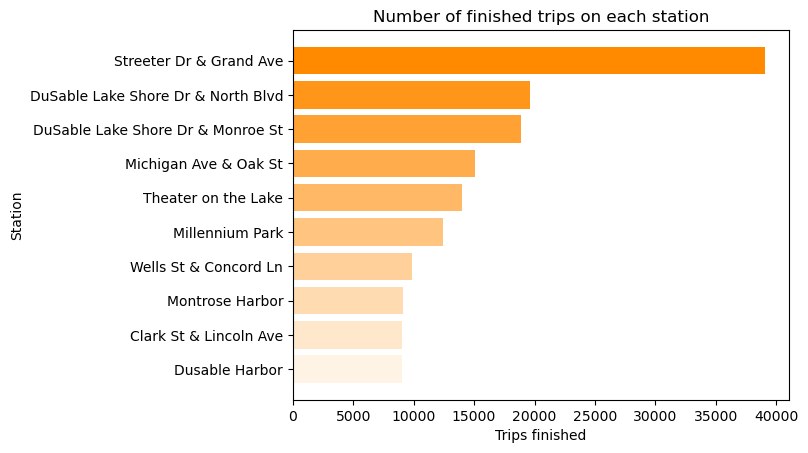

In [18]:
station_casual_month_end_st = station_casual_month_end.head(10).sort_values()
cores= [[1,0.54,0,(11-i)/10] for i in range(len(station_casual_month_st),0,-1)]
plt.barh(station_casual_month_end_st.index.get_level_values(0),station_casual_month_end_st.values,color=cores)
plt.xlabel('Trips finished')
plt.ylabel('Station')
plt.title('Number of finished trips on each station')
plt.show()

18. We can see that the 10 stations that appeared on the query are the same as the query in the started trips, we can see that there are much more trips finished on Streeter Dr & Grand Avenue than started, this can indicate that most 'casual' users has the objective to reach this station, we will create two more graphs with coordinates.


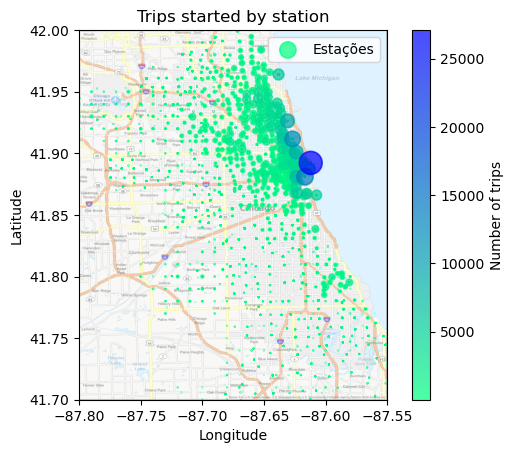

In [19]:
station_casual_month = station_casual_month.sort_values()
chicago_img = mpimg.imread('/kaggle/input/chicago-image/Chicago-Map-Illinois.jpg')
plt.scatter(x=station_casual_month.index.get_level_values(2),y=station_casual_month.index.get_level_values(1),s=station_casual_month.values/100,
            alpha=0.7,label='Estações',linewidths=1.2,c=station_casual_month.values,cmap=plt.get_cmap("winter_r"))
clb = plt.colorbar()
clb.set_label('Number of trips')
plt.imshow(chicago_img, extent=[-87.80, -87.55, 41.7, 42.0], alpha=0.5)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Trips started by station')
plt.legend()
plt.show()

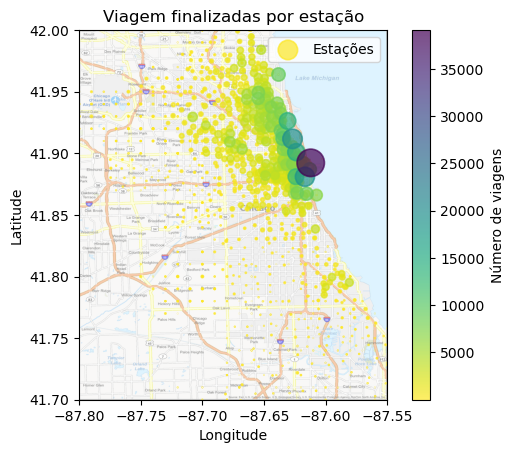

In [20]:
station_casual_month_end = station_casual_month_end.sort_values()
chicago_img = mpimg.imread('/kaggle/input/chicago-image/Chicago-Map-Illinois.jpg')
plt.scatter(x=station_casual_month_end.index.get_level_values(2),y=station_casual_month_end.index.get_level_values(1),s=station_casual_month_end.values/100,
            alpha=0.7,label='Estações',linewidths=1.2,c=station_casual_month_end.values,cmap=plt.get_cmap("viridis_r"))
clb = plt.colorbar()
clb.set_label('Número de viagens')
plt.imshow(chicago_img, extent=[-87.80, -87.55, 41.7, 42.0], alpha=0.5)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Viagem finalizadas por estação')
plt.legend()
plt.show()

19. We can see with the two graphs that the trips are concetrated on the Chicago coast, in the second the volume of trips finished is bigger, that can indicate that the users are going to enjoy the nice weather (seasons are between spring, summer and fall) nearby the station.

#### Conclusion 

Let's respond each question:

**1. How the members and casual cyclists differ on the use of the Cyclistic bicycles?**

58.9% are 'member' users and 41.1% are 'casual' users.

With the data of 2022 analysed, we can see that the members 'casual' and 'member' utilizes the bikeshare service with different objectives. The data indicates that the users 'member' utilize the service in the day to day tasks, commuting to work or school, to markets or stores, because we see most of the trips in the weekdays. The 'casual' users utilize less on the weekdays, concentrating their trips on the weekend, probably utilizing for leisure.

The average trips can be a indicative too, the number of trips of 'member' are greater than 'casual' users, and their duration is shorter, what can indicate trips that have an objective in mind (commuting), and the 'casual' have longer trips, probably for leisure and free time exercise. The average duration of a 'member' trip is aproximately 13 minutes and the 'casual' is aproximately 30 minutes.

**2. Why casual members would like to acquire the Cyclistic annual plans?**

We can see that in certain periods of the year the 'casual' users are equivalent in the use of the bikeshare service to the 'member' users, mainly in the summer between June and August. There could be some savings when purchasing the annual plans, even if they use little in other months.

**3. How Cyclistic can use digital media to influence the casual members to turn into annual members?**

As the probable use of the service for 'casual' users is for leisure purposes and is related to the seasons and temperatures of the year, it is likely that advertising on pages related to well-being, health, physical activity, outdoor activities are the best choices, and concentrating most of these advertisements between spring and autumn (April and October) with a greater focus on the summer period (June to August), also advertising in city route applications, in addition to banners and billboards in the most used seasons by 'casual' users (eg Streeter Dr & Grand Ave).

